# H1N1 Vaccine - Predictive Modeling Project

## Data Understanding

In [1]:
# Imports

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.utils import resample
from sklearn.datasets import load_breast_cancer, load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

In [21]:
# Reading in training data

h1n1_train = pd.read_csv('./data/h1n1_training_data.csv')
h1n1_train.to_csv()
h1n1_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [22]:
h1n1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [18]:
# Reading in training label data 

training_labels = pd.read_csv('./data/training_labels.csv')

training_labels.to_csv()

training_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [23]:
# Merging labels and training features dataset 

vaccine_data = training_labels.merge(h1n1_train,how = 'left',left_on = 'respondent_id',right_on = 'respondent_id')

In [24]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  int64  
 2   seasonal_vaccine             26707 non-null  int64  
 3   h1n1_concern                 26615 non-null  float64
 4   h1n1_knowledge               26591 non-null  float64
 5   behavioral_antiviral_meds    26636 non-null  float64
 6   behavioral_avoidance         26499 non-null  float64
 7   behavioral_face_mask         26688 non-null  float64
 8   behavioral_wash_hands        26665 non-null  float64
 9   behavioral_large_gatherings  26620 non-null  float64
 10  behavioral_outside_home      26625 non-null  float64
 11  behavioral_touch_face        26579 non-null  float64
 12  doctor_recc_h1n1             24547 non-null  float64
 13  doctor_recc_seas

In [56]:
vaccine_data.shape

(26707, 38)

In [25]:
# Checking for unique values 

vaccine_data.nunique()

respondent_id                  26707
h1n1_vaccine                       2
seasonal_vaccine                   2
h1n1_concern                       4
h1n1_knowledge                     3
behavioral_antiviral_meds          2
behavioral_avoidance               2
behavioral_face_mask               2
behavioral_wash_hands              2
behavioral_large_gatherings        2
behavioral_outside_home            2
behavioral_touch_face              2
doctor_recc_h1n1                   2
doctor_recc_seasonal               2
chronic_med_condition              2
child_under_6_months               2
health_worker                      2
health_insurance                   2
opinion_h1n1_vacc_effective        5
opinion_h1n1_risk                  5
opinion_h1n1_sick_from_vacc        5
opinion_seas_vacc_effective        5
opinion_seas_risk                  5
opinion_seas_sick_from_vacc        5
age_group                          5
education                          4
race                               4
s

In [27]:
# Note: large null values in health insurance, employement_industry, employment_occupation 

In [52]:
vaccine_data['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [53]:
# imbalanced target for h1n1


In [54]:
vaccine_data['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

In [58]:
# Correlation between targets 

(vaccine_data["h1n1_vaccine"]
     .corr(vaccine_data["seasonal_vaccine"], method="pearson")
)

0.37714265306144623

In [147]:
pd.crosstab(
    vaccine_data["h1n1_vaccine"], 
    vaccine_data["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


## Baseline Models - Logistic Regression

In [143]:
# Logisitic Regression for Seasonal Vaccine

X = numeric_data.drop(columns=['seasonal_vaccine','respondent_id'])
y = vaccine_data['seasonal_vaccine']

from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

imputer = imputer.fit(X)

X = imputer.transform(X)

In [144]:
from sklearn.multioutput import MultiOutputClassifier

estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,random_state=42)

In [146]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
baseline_model = LogisticRegression(
            C=1e3,             # Smaller values -> more regularization
            max_iter=1e3,      # Ensure we eventually reach a solution
            solver='lbfgs',    # (Default) Can optimize depending on problem
            multi_class='ovr'  # (Default) Will try to do multiclass classification 
)

In [129]:
baseline_model.fit(X_train_scaled,y_train)

LogisticRegression(C=1000.0, max_iter=1000.0, multi_class='ovr')

In [130]:
baseline_model

LogisticRegression(C=1000.0, max_iter=1000.0, multi_class='ovr')

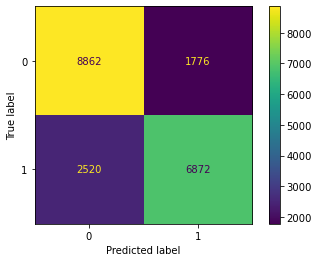

In [131]:
plot_confusion_matrix(baseline_model,X_train_scaled,y_train)

In [132]:
from sklearn.model_selection import cross_val_score



cv_scores = cross_val_score(baseline_model,X_train_scaled,y_train,cv=3)

In [133]:
cv_scores

array([0.78388498, 0.78448405, 0.78639904])

In [134]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


y_pred_test = baseline_model.predict(X_test_scaled)

model_accuracy = accuracy_score(y_test,y_pred_test)
model_recall = recall_score(y_test,y_pred_test)
model_precision = precision_score(y_test,y_pred_test)
model_f1 = f1_score(y_test,y_pred_test)


print(model_accuracy,model_recall,model_precision,model_f1)

0.790025460536169 0.7449884981925731 0.7836156239198064 0.7638140161725068


In [135]:
# Logistical regression for H1N1

X = numeric_data.drop(columns=['h1n1_vaccine','respondent_id'])
y = vaccine_data['h1n1_vaccine']

from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

imputer = imputer.fit(X)

X = imputer.transform(X)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

baseline_model_2 = LogisticRegression(
            C=1e3,             # Smaller values -> more regularization
            max_iter=1e3,      # Ensure we eventually reach a solution
            solver='lbfgs',    # (Default) Can optimize depending on problem
            multi_class='ovr'  # (Default) Will try to do multiclass classification 
)

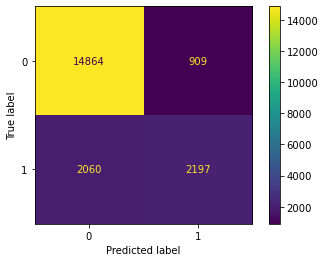

In [138]:
baseline_model_2.fit(X_train_scaled,y_train)

plot_confusion_matrix(baseline_model_2,X_train_scaled,y_train)

In [139]:
cv_scores_2 = cross_val_score(baseline_model_2,X_train_scaled,y_train,cv=3)

cv_scores_2

array([0.84963307, 0.8536768 , 0.85125824])

In [140]:


y_pred_test = baseline_model_2.predict(X_test_scaled)

model_accuracy = accuracy_score(y_test,y_pred_test)
model_recall = recall_score(y_test,y_pred_test)
model_precision = precision_score(y_test,y_pred_test)
model_f1 = f1_score(y_test,y_pred_test)


print(model_accuracy,model_recall,model_precision,model_f1)

0.8515800509210724 0.5130557515878617 0.7071984435797666 0.594683026584867


In [150]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (vaccine_data[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

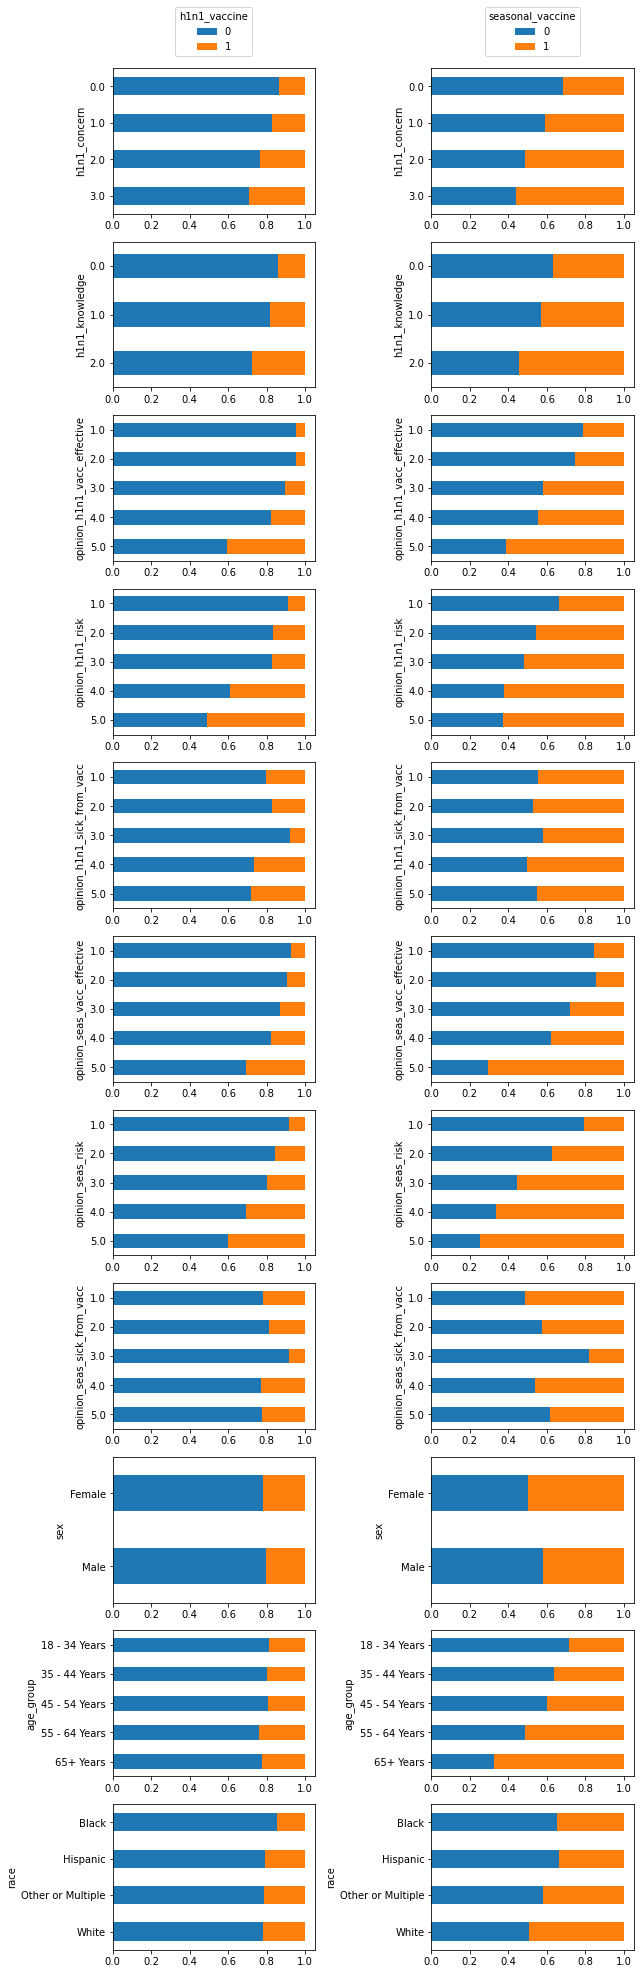

In [155]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', vaccine_data, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', vaccine_data, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()